# Read Data

In [1]:
import pandas_datareader.data as web
from datetime import datetime, timedelta
import pandas as pd
import matplotlib.pyplot as plt
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np
import yfinance as yf

# Volatility

In [2]:
start = datetime(2014, 1, 1)
end = datetime(2024, 1, 1)

#ticker = web.DataReader('^IXIC', 'yahoo', start=start, end=end)
ticker = yf.Ticker('^IXIC').history(interval='1d', start=start, end=end)

returns = 100 * ticker.Close.pct_change().dropna()

Text(0.5, 1.0, 'Returns')

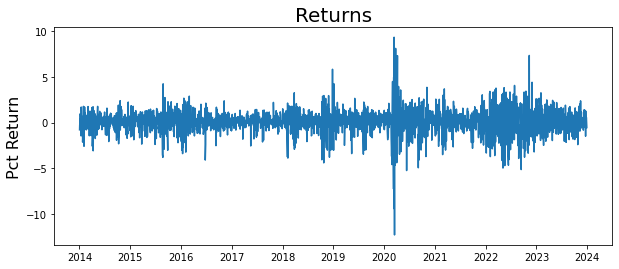

In [3]:
plt.figure(figsize=(10,4))
plt.plot(returns)
plt.ylabel('Pct Return', fontsize=16)
plt.title('Returns', fontsize=20)

# ACF

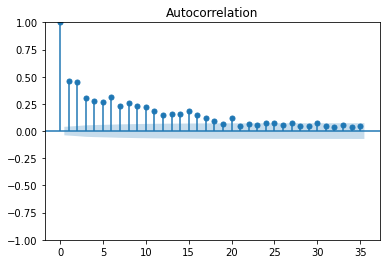

In [4]:
plot_acf(returns**2)
plt.show()

# PACF

C:\Users\user\AppData\Roaming\Python\Python310\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


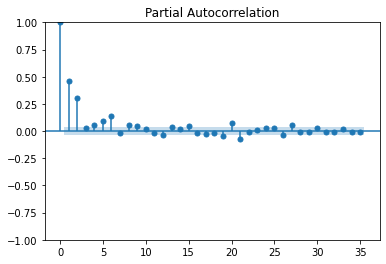

In [5]:
plot_pacf(returns**2)
plt.show()

## Fit GARCH(2,6)

In [6]:
model = arch_model(returns, p=2, q=6)

model_fit = model.fit()

model_fit.summary()

Iteration:      1,   Func. Count:     12,   Neg. LLF: 14411.08742146637
Iteration:      2,   Func. Count:     27,   Neg. LLF: 13200983514.922247
Iteration:      3,   Func. Count:     40,   Neg. LLF: 5091.137311171484
Iteration:      4,   Func. Count:     53,   Neg. LLF: 5121.298091801868
Iteration:      5,   Func. Count:     65,   Neg. LLF: 3996.993764016314
Iteration:      6,   Func. Count:     77,   Neg. LLF: 3809.2599377512984
Iteration:      7,   Func. Count:     89,   Neg. LLF: 3826.229935416831
Iteration:      8,   Func. Count:    101,   Neg. LLF: 3789.20842874383
Iteration:      9,   Func. Count:    113,   Neg. LLF: 3787.5190161058367
Iteration:     10,   Func. Count:    125,   Neg. LLF: 3786.0570604753575
Iteration:     11,   Func. Count:    136,   Neg. LLF: 3785.750585004065
Iteration:     12,   Func. Count:    147,   Neg. LLF: 3785.7476276421617
Iteration:     13,   Func. Count:    158,   Neg. LLF: 3785.742918867676
Iteration:     14,   Func. Count:    169,   Neg. LLF: 3785.7

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -3785.74
Distribution:                  Normal   AIC:                           7591.49
Method:            Maximum Likelihood   BIC:                           7649.79
                                        No. Observations:                 2516
Date:                Mon, Apr 22 2024   Df Residuals:                     2515
Time:                        13:08:18   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.0913  2.105e-02      4.336  1.450e-05 [5.003e-02,  0.133]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.0861  2.654e-02      3.244  1.180e-03 [3.407e-02,  0.138]
alpha[1]       0.1389  5.773e-02      2.407  1.610e-02 [2.579e-02,  0.252]
alpha[2]       0.1393  5.353e-02      2.602  9.261e-03 [3.438e-02,  0.244]
beta[1]        0.0000      0.601      0.000      1.000   [ -1.178,  1.178]
beta[2]        0.6316      0.590      1.070      0.285   [ -0.526,  1.789]
beta[3]        0.0000      0.685      0.000      1.000   [ -1.343,  1.343]
beta[4]        0.0000      0.946      0.000      1.000   [ -1.853,  1.853]
beta[5]        0.0406      0.677  6.003e-02      0.952   [ -1.286,  1.368]
beta[6]    4.9252e-14      0.801  6.148e-14      1.000   [ -1.570,  1.570]
==========================================================================

Covariance estimator: robust
"""

# Try GARCH(2,2)

In [7]:
model = arch_model(returns, p=2, q=2)

model_fit = model.fit()

model_fit.summary()

Iteration:      1,   Func. Count:      8,   Neg. LLF: 16928.871174078722
Iteration:      2,   Func. Count:     20,   Neg. LLF: 16100.467185247682
Iteration:      3,   Func. Count:     31,   Neg. LLF: 5309.459698002242
Iteration:      4,   Func. Count:     40,   Neg. LLF: 5130.778980008094
Iteration:      5,   Func. Count:     49,   Neg. LLF: 3867.585197357805
Iteration:      6,   Func. Count:     57,   Neg. LLF: 3787.870193172392
Iteration:      7,   Func. Count:     65,   Neg. LLF: 3786.212249234662
Iteration:      8,   Func. Count:     72,   Neg. LLF: 3785.9669709245236
Iteration:      9,   Func. Count:     79,   Neg. LLF: 3785.9475841725034
Iteration:     10,   Func. Count:     86,   Neg. LLF: 3785.938589791724
Iteration:     11,   Func. Count:     93,   Neg. LLF: 3785.9260785265974
Iteration:     12,   Func. Count:    100,   Neg. LLF: 3785.925900613875
Iteration:     13,   Func. Count:    107,   Neg. LLF: 3785.9258669546057
Iteration:     14,   Func. Count:    114,   Neg. LLF: 3785

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -3785.93
Distribution:                  Normal   AIC:                           7583.85
Method:            Maximum Likelihood   BIC:                           7618.83
                                        No. Observations:                 2516
Date:                Mon, Apr 22 2024   Df Residuals:                     2515
Time:                        13:08:18   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.0913  2.037e-02      4.480  7.473e-06 [5.134e-02,  0.131]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.0848  2.291e-02      3.702  2.142e-04 [3.990e-02,  0.130]
alpha[1]       0.1338  2.846e-02      4.701  2.592e-06 [7.800e-02,  0.190]
alpha[2]       0.1358  3.403e-02      3.990  6.600e-05 [6.909e-02,  0.202]
beta[1]    1.0953e-13      0.165  6.642e-13      1.000   [ -0.323,  0.323]
beta[2]        0.6818      0.142      4.785  1.706e-06   [  0.403,  0.961]
==========================================================================

Covariance estimator: robust
"""

In [8]:
rolling_predictions = []
test_size = 365

for i in range(test_size):
    train = returns[:-(test_size-i)]
    model = arch_model(train, p=2, q=2)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

C:\Users\user\AppData\Roaming\Python\Python310\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\user\AppData\Roaming\Python\Python310\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\user\AppData\Roaming\Python\Python310\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
Fal

C:\Users\user\AppData\Roaming\Python\Python310\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\user\AppData\Roaming\Python\Python310\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\user\AppData\Roaming\Python\Python310\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
Fal

C:\Users\user\AppData\Roaming\Python\Python310\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\user\AppData\Roaming\Python\Python310\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\user\AppData\Roaming\Python\Python310\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
Fal

C:\Users\user\AppData\Roaming\Python\Python310\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\user\AppData\Roaming\Python\Python310\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\user\AppData\Roaming\Python\Python310\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
Fal

C:\Users\user\AppData\Roaming\Python\Python310\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\user\AppData\Roaming\Python\Python310\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\user\AppData\Roaming\Python\Python310\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
Fal

C:\Users\user\AppData\Roaming\Python\Python310\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\user\AppData\Roaming\Python\Python310\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\user\AppData\Roaming\Python\Python310\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
Fal

C:\Users\user\AppData\Roaming\Python\Python310\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\user\AppData\Roaming\Python\Python310\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\user\AppData\Roaming\Python\Python310\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
Fal

C:\Users\user\AppData\Roaming\Python\Python310\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\user\AppData\Roaming\Python\Python310\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\user\AppData\Roaming\Python\Python310\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
Fal

C:\Users\user\AppData\Roaming\Python\Python310\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\user\AppData\Roaming\Python\Python310\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\user\AppData\Roaming\Python\Python310\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
Fal

C:\Users\user\AppData\Roaming\Python\Python310\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\user\AppData\Roaming\Python\Python310\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\user\AppData\Roaming\Python\Python310\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
Fal

C:\Users\user\AppData\Roaming\Python\Python310\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\user\AppData\Roaming\Python\Python310\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\user\AppData\Roaming\Python\Python310\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
Fal

C:\Users\user\AppData\Roaming\Python\Python310\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\user\AppData\Roaming\Python\Python310\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\user\AppData\Roaming\Python\Python310\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
Fal

C:\Users\user\AppData\Roaming\Python\Python310\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\user\AppData\Roaming\Python\Python310\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\user\AppData\Roaming\Python\Python310\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
Fal

C:\Users\user\AppData\Roaming\Python\Python310\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\user\AppData\Roaming\Python\Python310\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\user\AppData\Roaming\Python\Python310\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
Fal

C:\Users\user\AppData\Roaming\Python\Python310\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\user\AppData\Roaming\Python\Python310\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\user\AppData\Roaming\Python\Python310\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
Fal

C:\Users\user\AppData\Roaming\Python\Python310\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\user\AppData\Roaming\Python\Python310\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\user\AppData\Roaming\Python\Python310\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
Fal

In [9]:
rolling_predictions = pd.Series(rolling_predictions, index=returns.index[-365:])

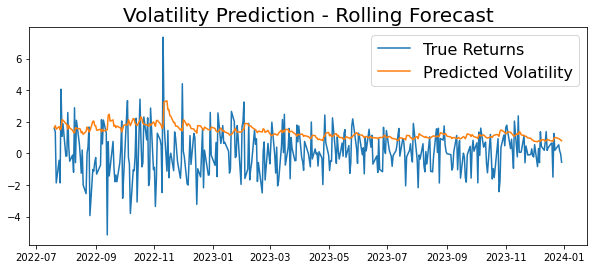

In [10]:
plt.figure(figsize=(10,4))
true, = plt.plot(returns[-365:])
preds, = plt.plot(rolling_predictions)
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Returns', 'Predicted Volatility'], fontsize=16)

# How to use the model

In [11]:
train = returns
model = arch_model(train, p=2, q=2)
model_fit = model.fit(disp='off')

In [12]:
pred = model_fit.forecast(horizon=7)
future_dates = [returns.index[-1] + timedelta(days=i) for i in range(1,8)]
pred = pd.Series(np.sqrt(pred.variance.values[-1,:]), index=future_dates)

C:\Users\user\AppData\Roaming\Python\Python310\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(


Text(0.5, 1.0, 'Volatility Prediction - Next 7 Days')

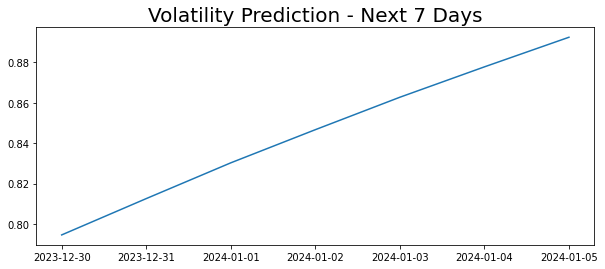

In [13]:
plt.figure(figsize=(10,4))
plt.plot(pred)
plt.title('Volatility Prediction - Next 7 Days', fontsize=20)